# Important Headers

In [265]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import random
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.layers import BatchNormalization, SeparableConv2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img

# Reading From Train File And Preproccessing That

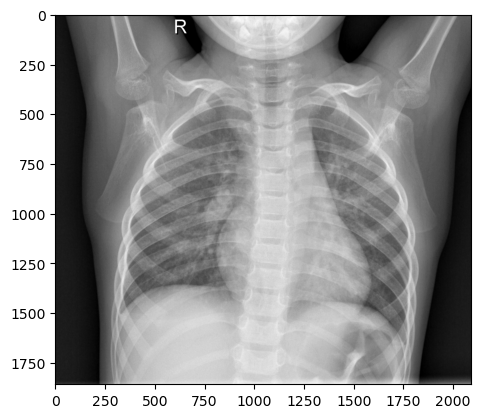

(1858, 2090)


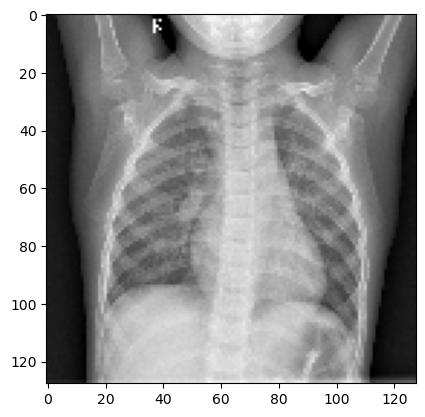

<class 'numpy.ndarray'>


In [282]:
DATA_TRAIN = "train"
CATEGORIES_TRAIN = ["NORMAL", "PNEUMONIA"]
for category in CATEGORIES_TRAIN:
    path = os.path.join(DATA_TRAIN, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

print(img_array.shape)
IMG_SIZE = 128

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

training_data = []

def create_training_data():
    for category in CATEGORIES_TRAIN:
        path = os.path.join(DATA_TRAIN, category)
        class_num = CATEGORIES_TRAIN.index(category)
        #print(class_num, " + ",category)
        #print(type(class_num), " + ",type(category))
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                #print(new_array, class_num)
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_training_data()      


import random

random.shuffle(training_data)


x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)
print(type(y))

# Reading From Test File And Preproccessing That

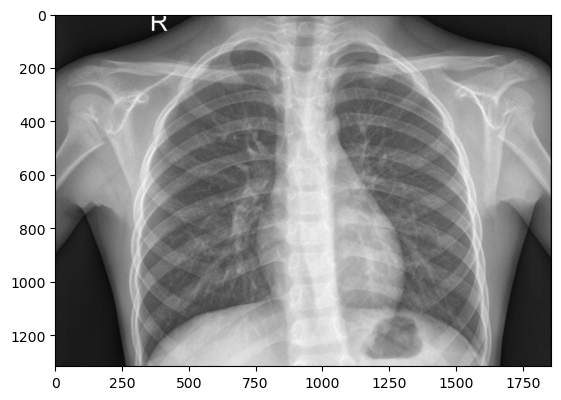

(1317, 1857)


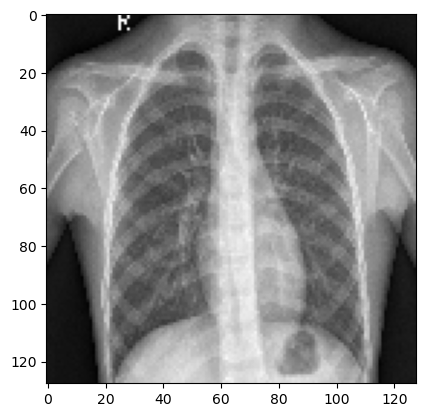

<class 'numpy.ndarray'>


In [267]:
DATADIR_TEST = "test"
CATEGORIES_TEST = ["NORMAL", "PNEUMONIA"]
for category in CATEGORIES_TEST:
    path = os.path.join(DATADIR_TEST, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

print(img_array.shape)
IMG_SIZE = 128

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

testing_data = []

def create_testing_data():
    for category in CATEGORIES_TEST:
        path = os.path.join(DATADIR_TEST, category)
        class_num = CATEGORIES_TEST.index(category)
        #print(class_num, " + ",category)
        #print(type(class_num), " + ",type(category))
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                #print(new_array, class_num)
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_testing_data()      


import random

random.shuffle(testing_data)


x_test = []
y_test = []

for features, label in testing_data:
    x_test.append(features)
    y_test.append(label)

x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)
print(type(y_test))

# Reading From Validation File And Preproccessing That

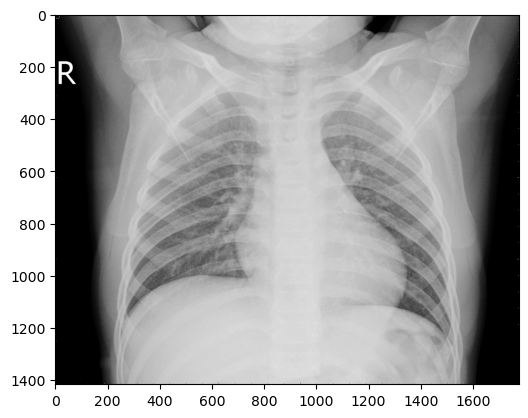

(1416, 1776)


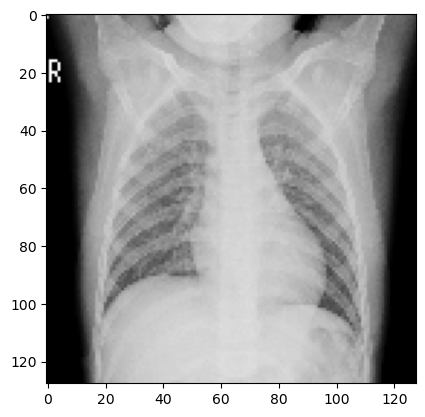

<class 'numpy.ndarray'>


In [268]:
DATADIR_VAL = "val"
CATEGORIES_VAL = ["NORMAL", "PNEUMONIA"]
for category in CATEGORIES_VAL:
    path = os.path.join(DATADIR_VAL, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

print(img_array.shape)
IMG_SIZE = 128

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

validation_data = []

def create_validation_data():
    for category in CATEGORIES_VAL:
        path = os.path.join(DATADIR_VAL, category)
        class_num = CATEGORIES_VAL.index(category)
        #print(class_num, " + ",category)
        #print(type(class_num), " + ",type(category))
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                #print(new_array, class_num)
                validation_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_validation_data()      


import random

random.shuffle(validation_data)


x_val = []
y_val = []

for features, label in validation_data:
    x_val.append(features)
    y_val.append(label)

x_val = np.array(x_val).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)
print(type(y_val))

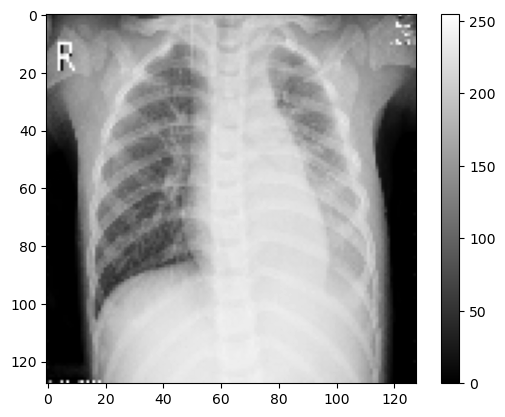

In [269]:
plt.figure()
plt.imshow(x[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

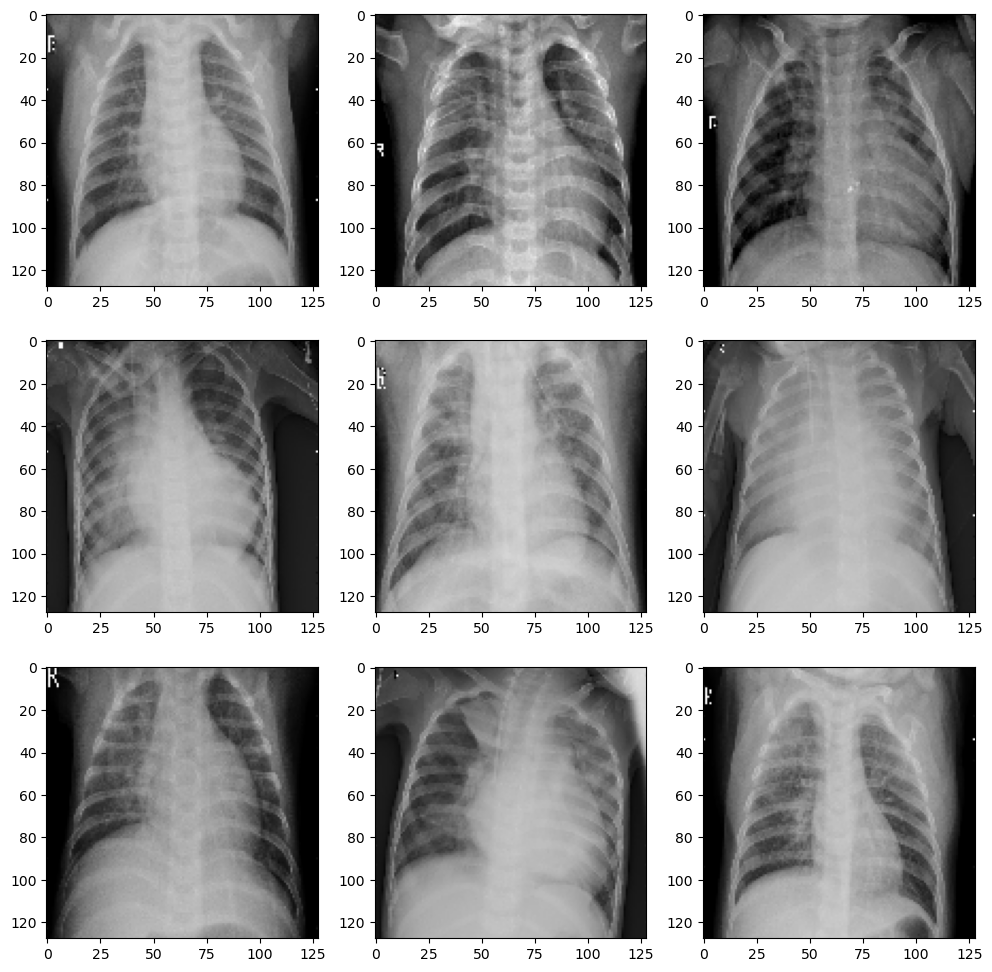

In [270]:
codition = 'PNEUMONIA'

plt.figure(figsize = (12, 12))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(DATA_TRAIN + '/' + codition + '/' + os.listdir(DATA_TRAIN + '/' + codition)[i], target_size = (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
plt.show()

# Review Number Of Images And Size In 3 Files

In [271]:

print(x.shape)
print(y.shape)
print("/=====================/")
print(x_test.shape)
print(y_test.shape)
print("/=====================/")
print(x_val.shape)
print(y_val.shape)


(5216, 128, 128, 1)
(5216,)
/=====================/
(624, 128, 128, 1)
(624,)
/=====================/
(16, 128, 128, 1)
(16,)


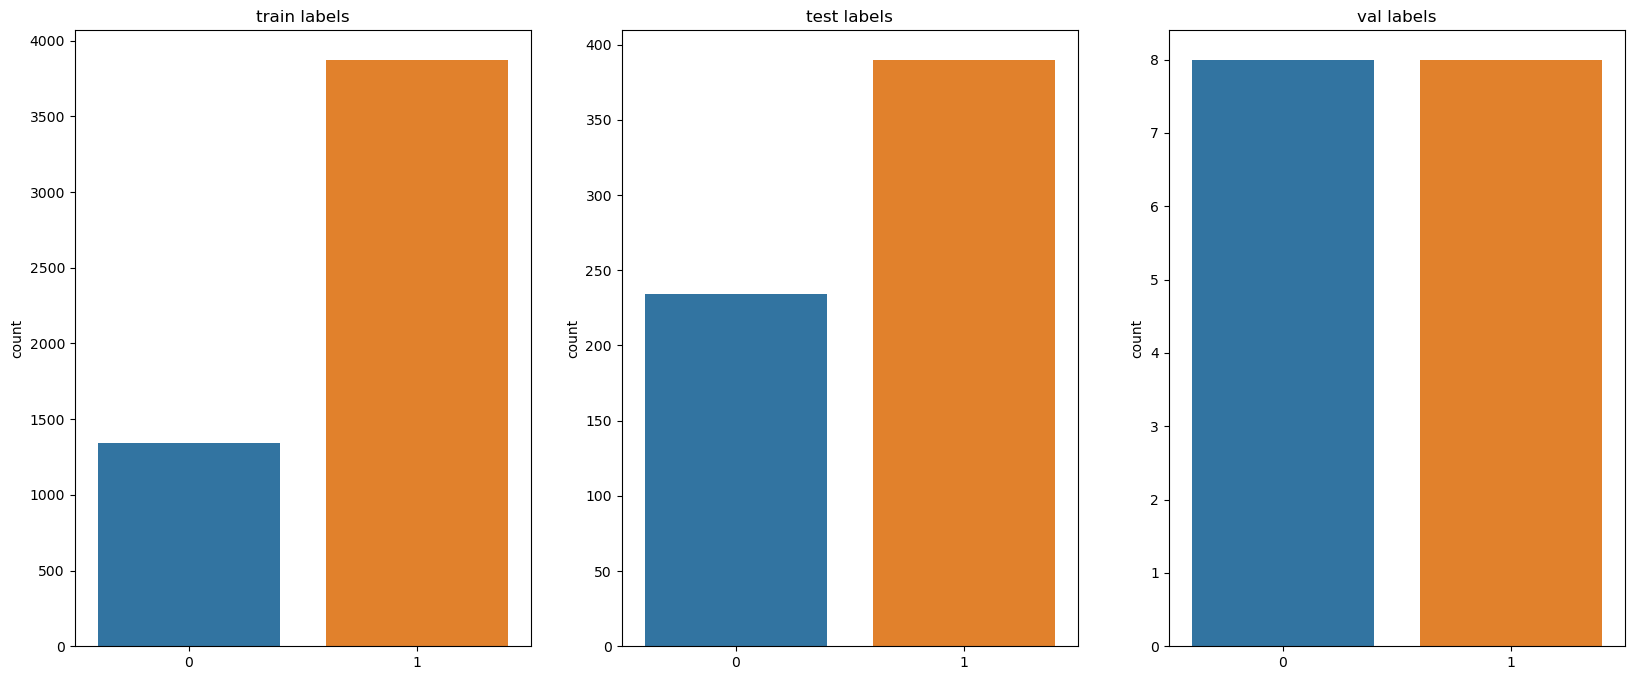

In [272]:
import seaborn as sns
plt.figure(10 , figsize = (20 ,8))
n = 0 
for z , j in zip([y , y_test, y_val] , ['train labels','test labels', 'val labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

# Data Augmentation

In [273]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        preprocessing.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

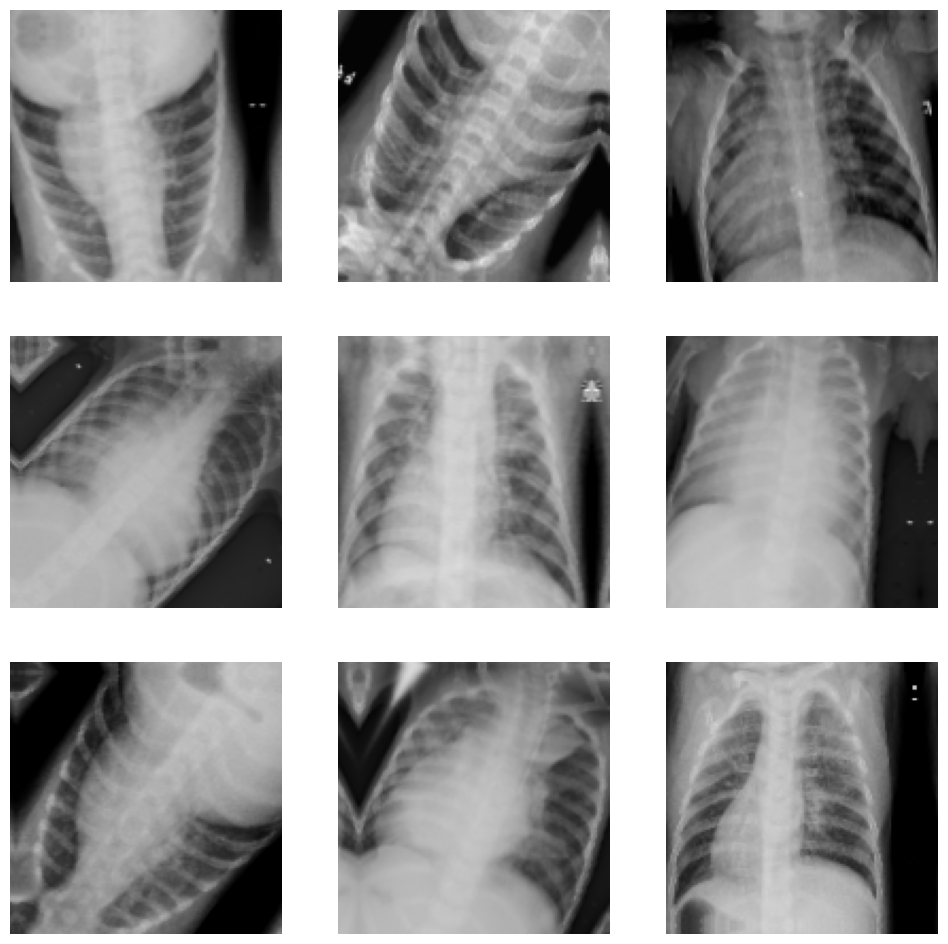

In [274]:
import warnings
warnings.filterwarnings('ignore')

condition = 'PNEUMONIA'

plt.figure(figsize=(12, 12))
for i in range(1, 10, 1):
    ax = plt.subplot(3, 3, i)
    img = load_img(DATA_TRAIN + '/' + condition + '/' + os.listdir(DATA_TRAIN + '/' + condition)[i], target_size=(IMG_SIZE, IMG_SIZE))
    aug_img = img_augmentation(tf.expand_dims(img, axis=0))
    plt.imshow(aug_img[0].numpy().astype("uint8"))
    plt.axis("off")
plt.show()


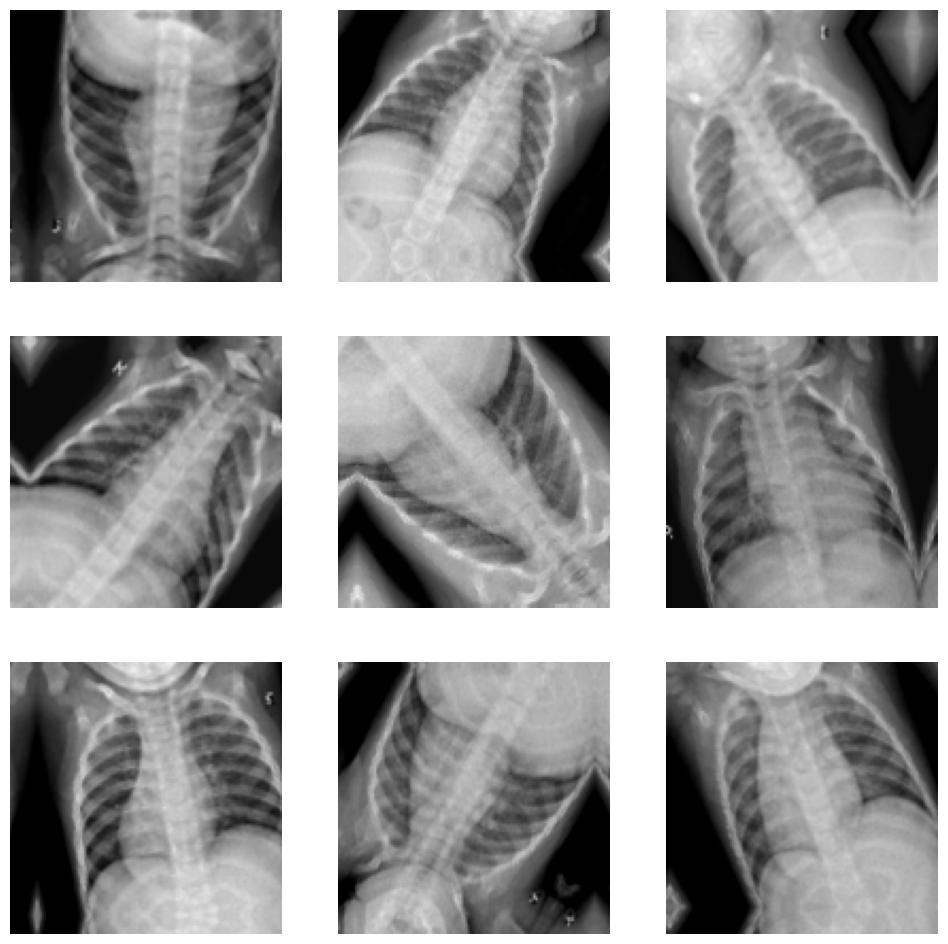

In [275]:
condition = 'NORMAL'

plt.figure(figsize = (12, 12))
for i in range(1, 10, 1):
    ax = plt.subplot(3, 3, i)
    img = load_img(DATA_TRAIN + '/' + condition + '/' + os.listdir(DATA_TRAIN + '/' + condition)[i], target_size = (IMG_SIZE, IMG_SIZE))
    aug_img = img_augmentation(tf.expand_dims(img, axis=0))
    plt.imshow(aug_img[0].numpy().astype("uint8"))
    plt.axis("off")
plt.show()

# Model [ EfficientNet B7 ]

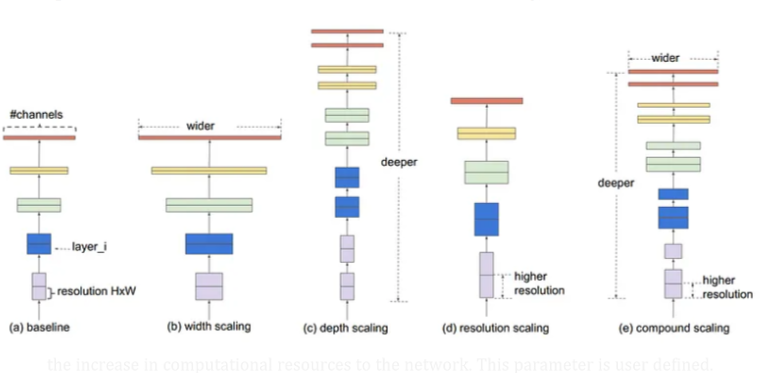


In [276]:
from tensorflow.keras.applications import EfficientNetB7

# Load pre-trained model (excluding top layers)
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Add a global average pooling layer
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add a decoder layer
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

# Add a softmax layer for classification
output_layer = tf.keras.layers.Dense(2, activation='softmax')(x)

# Define the model
model = tf.keras.models.Model(inputs=base_model.input, outputs=output_layer)

# Set trainable layers
for layer in model.layers[:-4]:
    layer.trainable = False

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 128, 128, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 128, 128, 3)  7          ['rescaling_4[0][0]']            
 )                                                                                                
                                                                                            

                                                                                                  
 block1c_activation (Activation  (None, 64, 64, 32)  0           ['block1c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block1c_se_squeeze (GlobalAver  (None, 32)          0           ['block1c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block1c_se_reshape (Reshape)   (None, 1, 1, 32)     0           ['block1c_se_squeeze[0][0]']     
                                                                                                  
 block1c_se_reduce (Conv2D)     (None, 1, 1, 8)      264         ['block1c_se_reshape[0][0]']     
          

                                                                                                  
 block2a_se_expand (Conv2D)     (None, 1, 1, 192)    1728        ['block2a_se_reduce[0][0]']      
                                                                                                  
 block2a_se_excite (Multiply)   (None, 32, 32, 192)  0           ['block2a_activation[0][0]',     
                                                                  'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, 32, 32, 48)   9216        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 32, 32, 48)  192         ['block2a_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block2c_drop (Dropout)         (None, 32, 32, 48)   0           ['block2c_project_bn[0][0]']     
                                                                                                  
 block2c_add (Add)              (None, 32, 32, 48)   0           ['block2c_drop[0][0]',           
                                                                  'block2b_add[0][0]']            
                                                                                                  
 block2d_expand_conv (Conv2D)   (None, 32, 32, 288)  13824       ['block2c_add[0][0]']            
                                                                                                  
 block2d_expand_bn (BatchNormal  (None, 32, 32, 288)  1152       ['block2d_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block2f_expand_conv (Conv2D)   (None, 32, 32, 288)  13824       ['block2e_add[0][0]']            
                                                                                                  
 block2f_expand_bn (BatchNormal  (None, 32, 32, 288)  1152       ['block2f_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2f_expand_activation (Act  (None, 32, 32, 288)  0          ['block2f_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2f_dwconv (DepthwiseConv2  (None, 32, 32, 288)  2592       ['block2f_expand_activation[0][0]
 D)       

                                                                                                  
 block3a_expand_activation (Act  (None, 32, 32, 288)  0          ['block3a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3a_dwconv_pad (ZeroPaddin  (None, 35, 35, 288)  0          ['block3a_expand_activation[0][0]
 g2D)                                                            ']                               
                                                                                                  
 block3a_dwconv (DepthwiseConv2  (None, 16, 16, 288)  7200       ['block3a_dwconv_pad[0][0]']     
 D)                                                                                               
                                                                                                  
 block3a_b

 block3c_bn (BatchNormalization  (None, 16, 16, 480)  1920       ['block3c_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3c_activation (Activation  (None, 16, 16, 480)  0          ['block3c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3c_se_squeeze (GlobalAver  (None, 480)         0           ['block3c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3c_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block3c_se_squeeze[0][0]']     
          

                                                                                                  
 block3e_se_squeeze (GlobalAver  (None, 480)         0           ['block3e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3e_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block3e_se_squeeze[0][0]']     
                                                                                                  
 block3e_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block3e_se_reshape[0][0]']     
                                                                                                  
 block3e_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block3e_se_reduce[0][0]']      
                                                                                                  
 block3e_s

                                                                                                  
 block3g_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block3g_se_reshape[0][0]']     
                                                                                                  
 block3g_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block3g_se_reduce[0][0]']      
                                                                                                  
 block3g_se_excite (Multiply)   (None, 16, 16, 480)  0           ['block3g_activation[0][0]',     
                                                                  'block3g_se_expand[0][0]']      
                                                                                                  
 block3g_project_conv (Conv2D)  (None, 16, 16, 80)   38400       ['block3g_se_excite[0][0]']      
                                                                                                  
 block3g_p

                                                                                                  
 block4b_project_conv (Conv2D)  (None, 8, 8, 160)    153600      ['block4b_se_excite[0][0]']      
                                                                                                  
 block4b_project_bn (BatchNorma  (None, 8, 8, 160)   640         ['block4b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_drop (Dropout)         (None, 8, 8, 160)    0           ['block4b_project_bn[0][0]']     
                                                                                                  
 block4b_add (Add)              (None, 8, 8, 160)    0           ['block4b_drop[0][0]',           
                                                                  'block4a_project_bn[0][0]']     
          

                                                                                                  
 block4d_drop (Dropout)         (None, 8, 8, 160)    0           ['block4d_project_bn[0][0]']     
                                                                                                  
 block4d_add (Add)              (None, 8, 8, 160)    0           ['block4d_drop[0][0]',           
                                                                  'block4c_add[0][0]']            
                                                                                                  
 block4e_expand_conv (Conv2D)   (None, 8, 8, 960)    153600      ['block4d_add[0][0]']            
                                                                                                  
 block4e_expand_bn (BatchNormal  (None, 8, 8, 960)   3840        ['block4e_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block4g_expand_conv (Conv2D)   (None, 8, 8, 960)    153600      ['block4f_add[0][0]']            
                                                                                                  
 block4g_expand_bn (BatchNormal  (None, 8, 8, 960)   3840        ['block4g_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4g_expand_activation (Act  (None, 8, 8, 960)   0           ['block4g_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4g_dwconv (DepthwiseConv2  (None, 8, 8, 960)   8640        ['block4g_expand_activation[0][0]
 D)       

                                                                                                  
 block4i_expand_activation (Act  (None, 8, 8, 960)   0           ['block4i_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4i_dwconv (DepthwiseConv2  (None, 8, 8, 960)   8640        ['block4i_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4i_bn (BatchNormalization  (None, 8, 8, 960)   3840        ['block4i_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4i_a

 D)                                                              ']                               
                                                                                                  
 block5a_bn (BatchNormalization  (None, 8, 8, 960)   3840        ['block5a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block5a_activation (Activation  (None, 8, 8, 960)   0           ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 960)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
          

                                                                                                  
 block5c_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5c_se_squeeze[0][0]']     
                                                                                                  
 block5c_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5c_se_reshape[0][0]']     
                                                                                                  
 block5c_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 8, 8, 1344)   0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_p

 block5e_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5e_se_reduce[0][0]']      
                                                                                                  
 block5e_se_excite (Multiply)   (None, 8, 8, 1344)   0           ['block5e_activation[0][0]',     
                                                                  'block5e_se_expand[0][0]']      
                                                                                                  
 block5e_project_conv (Conv2D)  (None, 8, 8, 224)    301056      ['block5e_se_excite[0][0]']      
                                                                                                  
 block5e_project_bn (BatchNorma  (None, 8, 8, 224)   896         ['block5e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5e_d

 block5g_project_conv (Conv2D)  (None, 8, 8, 224)    301056      ['block5g_se_excite[0][0]']      
                                                                                                  
 block5g_project_bn (BatchNorma  (None, 8, 8, 224)   896         ['block5g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5g_drop (Dropout)         (None, 8, 8, 224)    0           ['block5g_project_bn[0][0]']     
                                                                                                  
 block5g_add (Add)              (None, 8, 8, 224)    0           ['block5g_drop[0][0]',           
                                                                  'block5f_add[0][0]']            
                                                                                                  
 block5h_e

 block5i_drop (Dropout)         (None, 8, 8, 224)    0           ['block5i_project_bn[0][0]']     
                                                                                                  
 block5i_add (Add)              (None, 8, 8, 224)    0           ['block5i_drop[0][0]',           
                                                                  'block5h_add[0][0]']            
                                                                                                  
 block5j_expand_conv (Conv2D)   (None, 8, 8, 1344)   301056      ['block5i_add[0][0]']            
                                                                                                  
 block5j_expand_bn (BatchNormal  (None, 8, 8, 1344)  5376        ['block5j_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5j_e

 block6b_expand_bn (BatchNormal  (None, 4, 4, 2304)  9216        ['block6b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6b_expand_activation (Act  (None, 4, 4, 2304)  0           ['block6b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, 4, 4, 2304)  57600       ['block6b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6b_bn (BatchNormalization  (None, 4, 4, 2304)  9216        ['block6b_dwconv[0][0]']         
 )        

                                                                                                  
 block6d_dwconv (DepthwiseConv2  (None, 4, 4, 2304)  57600       ['block6d_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6d_bn (BatchNormalization  (None, 4, 4, 2304)  9216        ['block6d_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block6d_activation (Activation  (None, 4, 4, 2304)  0           ['block6d_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6d_s

 )                                                                                                
                                                                                                  
 block6f_activation (Activation  (None, 4, 4, 2304)  0           ['block6f_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6f_se_squeeze (GlobalAver  (None, 2304)        0           ['block6f_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6f_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6f_se_squeeze[0][0]']     
                                                                                                  
 block6f_s

 block6h_se_squeeze (GlobalAver  (None, 2304)        0           ['block6h_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6h_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6h_se_squeeze[0][0]']     
                                                                                                  
 block6h_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6h_se_reshape[0][0]']     
                                                                                                  
 block6h_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6h_se_reduce[0][0]']      
                                                                                                  
 block6h_se_excite (Multiply)   (None, 4, 4, 2304)   0           ['block6h_activation[0][0]',     
          

 block6j_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6j_se_reshape[0][0]']     
                                                                                                  
 block6j_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6j_se_reduce[0][0]']      
                                                                                                  
 block6j_se_excite (Multiply)   (None, 4, 4, 2304)   0           ['block6j_activation[0][0]',     
                                                                  'block6j_se_expand[0][0]']      
                                                                                                  
 block6j_project_conv (Conv2D)  (None, 4, 4, 384)    884736      ['block6j_se_excite[0][0]']      
                                                                                                  
 block6j_project_bn (BatchNorma  (None, 4, 4, 384)   1536        ['block6j_project_conv[0][0]']   
 lization)

                                                                  'block6l_se_expand[0][0]']      
                                                                                                  
 block6l_project_conv (Conv2D)  (None, 4, 4, 384)    884736      ['block6l_se_excite[0][0]']      
                                                                                                  
 block6l_project_bn (BatchNorma  (None, 4, 4, 384)   1536        ['block6l_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6l_drop (Dropout)         (None, 4, 4, 384)    0           ['block6l_project_bn[0][0]']     
                                                                                                  
 block6l_add (Add)              (None, 4, 4, 384)    0           ['block6l_drop[0][0]',           
          

 lization)                                                                                        
                                                                                                  
 block7b_expand_conv (Conv2D)   (None, 4, 4, 3840)   2457600     ['block7a_project_bn[0][0]']     
                                                                                                  
 block7b_expand_bn (BatchNormal  (None, 4, 4, 3840)  15360       ['block7b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7b_expand_activation (Act  (None, 4, 4, 3840)  0           ['block7b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7b_d

 ization)                                                                                         
                                                                                                  
 block7d_expand_activation (Act  (None, 4, 4, 3840)  0           ['block7d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7d_dwconv (DepthwiseConv2  (None, 4, 4, 3840)  34560       ['block7d_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7d_bn (BatchNormalization  (None, 4, 4, 3840)  15360       ['block7d_dwconv[0][0]']         
 )                                                                                                
          

In [285]:
IMG_SIZE = 128

# Define the model
model = Sequential([
    Conv2D(16, (3, 3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    LeakyReLU(),
    Conv2D(32, (3, 3), padding='same'),
    LeakyReLU(),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding='same'),
    LeakyReLU(),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), padding='same'),
    LeakyReLU(),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), padding='same'),
    LeakyReLU(),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(512, (3, 3), padding='same'),
    LeakyReLU(),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256),
    LeakyReLU(),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

tagen = ImageDataGenerator(rescale=1./255)

history = model.fit(x, y,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_val, y_val))


Epoch 1/10
163/163 [==============================] - 301s 2s/step - loss: 1.0140 - accuracy: 0.8976 - val_loss: 1.2157 - val_accuracy: 0.7115
Epoch 2/10
163/163 [==============================] - 300s 2s/step - loss: 0.0867 - accuracy: 0.9703 - val_loss: 1.2988 - val_accuracy: 0.7500
Epoch 3/10
163/163 [==============================] - 292s 2s/step - loss: 0.0630 - accuracy: 0.9770 - val_loss: 0.6155 - val_accuracy: 0.8526
Epoch 4/10
163/163 [==============================] - 292s 2s/step - loss: 0.0564 - accuracy: 0.9806 - val_loss: 1.8585 - val_accuracy: 0.7340
Epoch 5/10
163/163 [==============================] - 293s 2s/step - loss: 0.0506 - accuracy: 0.9827 - val_loss: 0.8779 - val_accuracy: 0.8061
Epoch 6/10
163/163 [==============================] - 312s 2s/step - loss: 2267.0217 - accuracy: 0.8597 - val_loss: 824.3442 - val_accuracy: 0.6442
Epoch 7/10
163/163 [==============================] - 311s 2s/step - loss: 170.6063 - accuracy: 0.7471 - val_loss: 10.2425 - val_accuracy

# Statement On The Model

In [286]:
results = model.evaluate(x_test,y_test)
val = model.evaluate(x_val,y_val)
print('The current model achieved a categorical accuracy of {}%!'.format(round(results[1]*100,2)))

1/1 [==============================] - 0s 254ms/step - loss: 5.1724 - accuracy: 0.8125
The current model achieved a categorical accuracy of 83.97%!


# Graphics
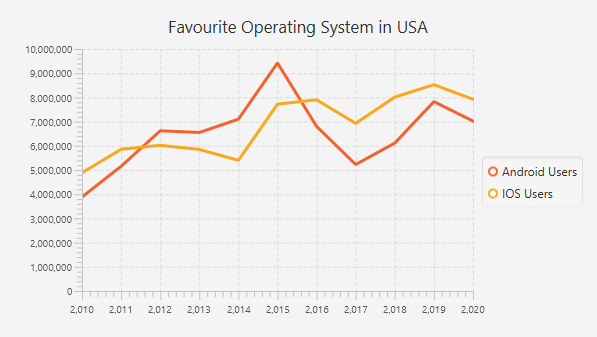

# 1 - Training Loss & Validation Loss

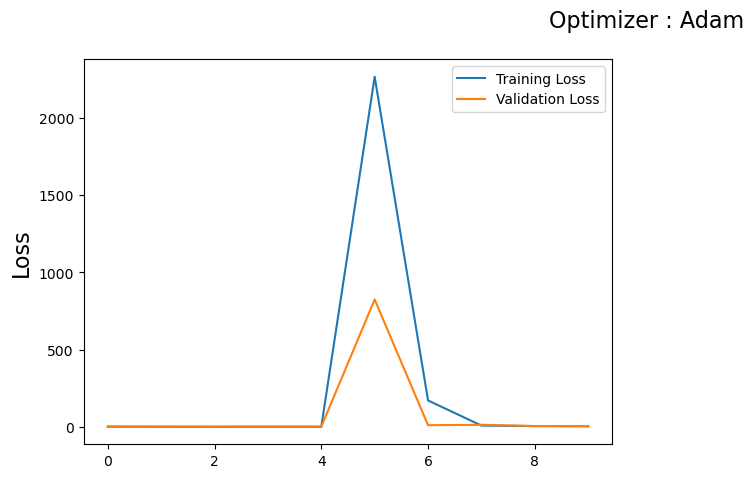

In [287]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

# 2 - Taining Accuracy & Validation Accuracy 

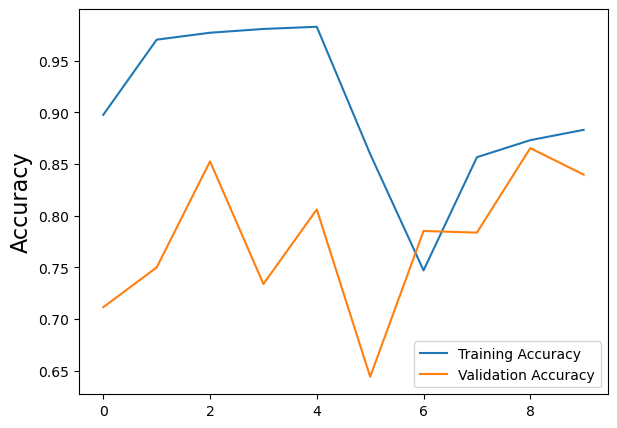

In [288]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# 3 - Train Accuracies

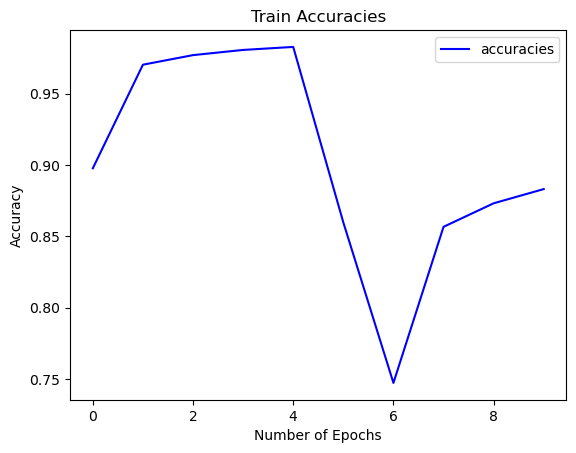

In [289]:
plt.plot(history.history['accuracy'], color='b', label="accuracies")
plt.title("Train Accuracies")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 4 - Train Loss

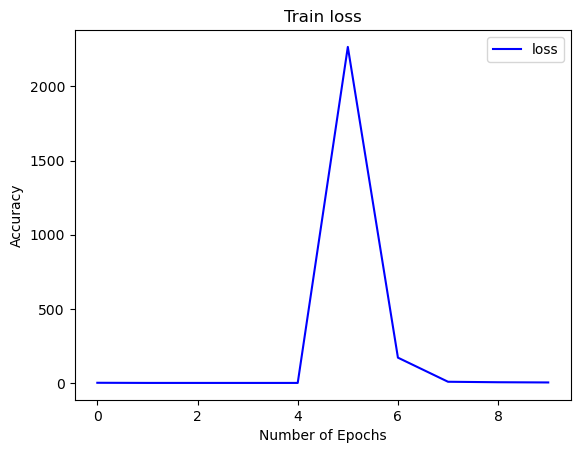

In [290]:
plt.plot(history.history['loss'], color='b', label="loss")
plt.title("Train loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 5 - Training Loss & Accuracy

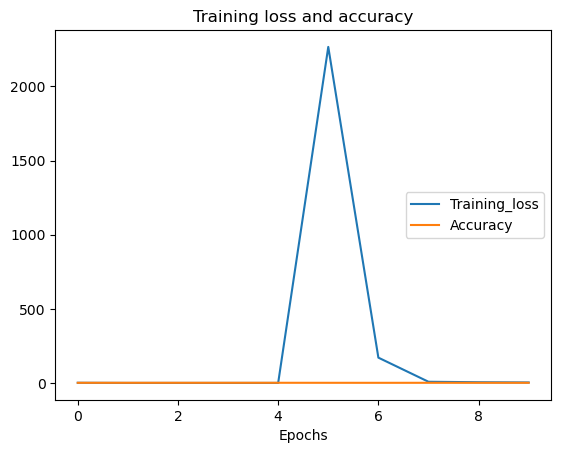

In [291]:
N=10 #epoch
plt.plot(np.arange(0,N),history.history['loss'],label='Training_loss')
plt.plot(np.arange(0,N),history.history['accuracy'],label='Accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.legend(loc='right')

# Prelude to Prediction

In [292]:
predictions = model.predict(x_test)
y_pred = [np.argmax(probas) for probas in predictions]

20/20 [==============================] - 9s 426ms/step


# Confusion Matrix
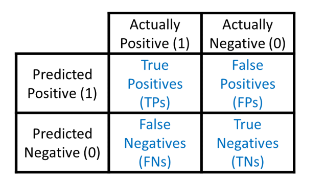

In [293]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<Figure size 640x480 with 0 Axes>

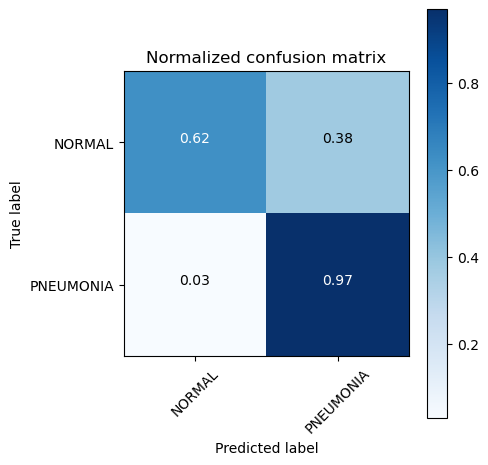

In [294]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=CATEGORIES_TRAIN, title='Normalized confusion matrix')
plt.show()

# Operations On Confusion Matrix

In [295]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
print("accuracy     =:    " ,format(round(acc[-1]*100,2)))
print("val_accuracy =:    " ,format(round(val_acc[-1]*100,2)))
print("loss         =:    " ,format(round(loss[-1]*100,2)))
print("val_loss     =:    " ,format(round(val_loss[-1]*100,2)))

accuracy     =:     88.31
val_accuracy =:     83.97
loss         =:     320.0
val_loss     =:     488.24


# Prediction
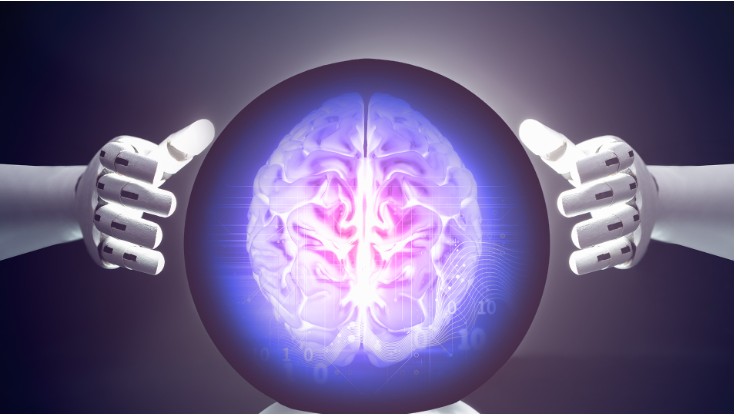

1/1 [==============================] - 0s 60ms/step
1
This image is :  PNEUMONIA


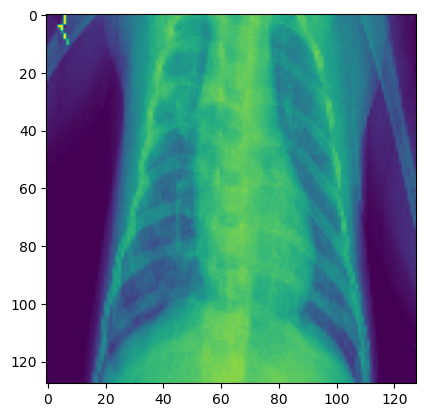

In [297]:
# Predict random image
k = random.randint(0, (len(x_test)))
pred1 = model.predict(x_test[k].reshape(1, 128, 128, 1))
print(pred1.argmax())
print("This image is : ", CATEGORIES[pred1.argmax()])
pic2 = x_test[k].reshape(128, 128)
plt.imshow(pic2)#, cmap = 'Greys')

# Save Model

In [ ]:
model.save("new.model")